In [12]:
# Load required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Define CLV Based on Available Data
#We will compute CLV using:
#CLV = ADR × Total Nights × (Previous Bookings Not Canceled + 1)
#What This Does:
#ADR, total nights, and booking frequency to estimate Customer Lifetime Value.
#Uses previous_bookings_not_canceled as a proxy for repeated bookings.

# Load the dataset
df = pd.read_csv("hotel_booking_business_analytics.csv")

# Ensure reservation date is datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Define total nights if not already present
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate Customer Lifetime Value (CLV)
df['clv'] = df['adr'] * df['total_nights'] * (df['previous_bookings_not_canceled'] + 1)

# Select relevant features for modeling
features = ['adr', 'total_nights', 'lead_time', 'is_canceled', 'previous_bookings_not_canceled']
target = 'clv'

X = df[features]
y = df[target]

# Display first few rows
df[['adr', 'total_nights', 'previous_bookings_not_canceled', 'clv']].head()

,adr,total_nights,previous_bookings_not_canceled,clv
0,0.0,0,0,0.0
1,0.0,0,0,0.0
2,75.0,1,0,75.0
3,75.0,1,0,75.0
4,98.0,2,0,196.0


In [6]:
#Train-Test Split
#We split the data into 80% training and 20% testing to evaluate model performance.
#Why
#Ensures model is evaluated on unseen data to prevent overfitting.
#80-20 split is industry standard for regression models.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (69916, 5), Test set: (17480, 5)


In [7]:
#Train the Random Forest Model
#We train a Random Forest Regressor with 100 decision trees.
#Why Random Forest?
#Captures non-linear relationships between features and CLV.
#Reduces overfitting by averaging multiple decision trees.
#Handles missing data & outliers better than traditional regression models.

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [9]:
#Evaluate Model Performance
#We measure how well the model predicts CLV using MAE, RMSE, and R² Score.
#What These Metrics Mean:
#MAE → Average prediction error in revenue terms.
#RMSE → Measures how far predictions deviate from actual CLV.
#R² Score → Tells us how much of CLV variability is explained by the model.

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Absolute Error (MAE): 3.78
Mean Squared Error (MSE): 6728.86
Root Mean Squared Error (RMSE): 82.03
R² Score: 0.9721


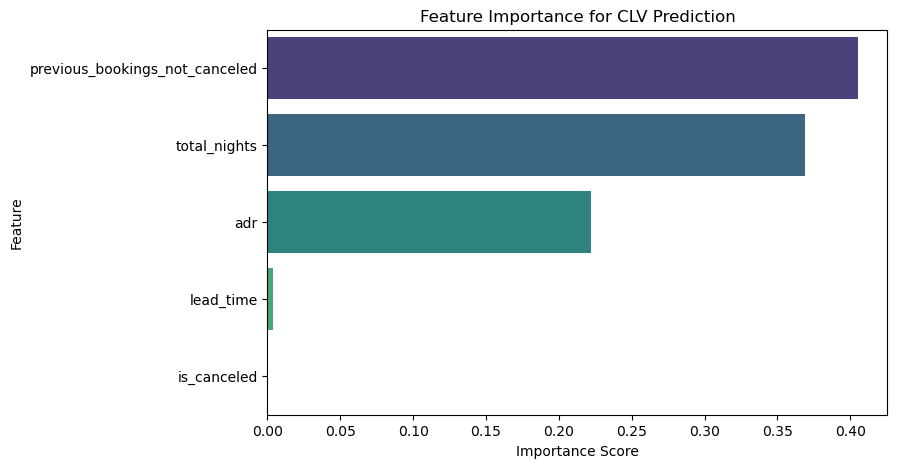

In [11]:
#Feature Importance Analysis
#We identify which factors impact CLV the most
#Why?
#Shows which customer behaviors influence CLV the most.
#Helps businesses focus on high-value customer retention strategies.

# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance for CLV Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [13]:
#Train an XGBoost Regressor for CLV Prediction
#Now, we will train an XGBoost Regressor and compare its performance with the Random Forest model
#Train-Test Split
#We use the same features (X) and target (y) from the Random Forest model.
#Why This Step?
#Ensures fair comparison with Random Forest.
#Prevents data leakage by keeping the test set separate.

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#We initialize and train an XGBoost Regressor with 100 estimators and a learning rate of 0.1.
#Why XGBoost?
#More efficient & faster than Random Forest.
#Uses gradient boosting to improve weak predictions.
#Handles non-linearity & feature interactions better.

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [15]:
#Evaluate Model Performance
#We calculate MAE, RMSE, and R² Score to compare with Random Forest.
#What These Metrics Mean:
#MAE (Mean Absolute Error): Measures average prediction error.
#RMSE (Root Mean Squared Error): Shows how much predictions deviate from actual values.
#R² Score: Measures how well the model explains CLV variance (higher is better).

# Calculate performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print model performance
print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")

XGBoost Model Performance:
Mean Absolute Error (MAE): 9.94
Mean Squared Error (MSE): 4809.16
Root Mean Squared Error (RMSE): 69.35
R² Score: 0.9801


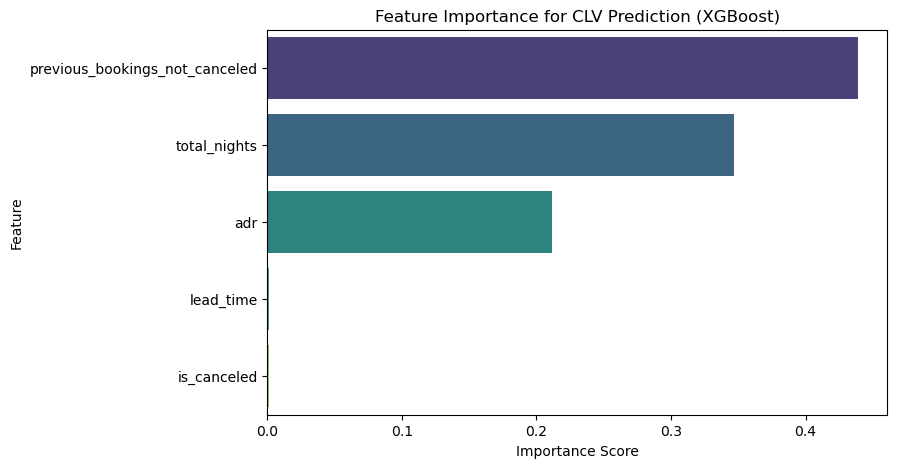

In [16]:
#Feature Importance Analysis
#We visualize which factors impact CLV the most.
#Why Feature Importance?
#Helps explain what drives high CLV customers.
#Assists hotels in targeting profitable customer segments.

# Get feature importance from the trained XGBoost model
feature_importance_xgb = xgb_model.feature_importances_

# Create a DataFrame for visualization
importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': feature_importance_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette="viridis")
plt.title("Feature Importance for CLV Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()